<h1>Импорт библиотек

In [4]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
def sum_prod(X, V):
    result = np.zeros((len(X[0]), 1))  
    
    for i in range(len(X)):
        result += np.dot(X[i], V[i])  
    
    return result

# Пример
X1 = [
    np.array([[1, 2], [3, 4]]),
    np.array([[5, 6], [7, 8]])
]
V1 = [
    np.array([[1], [1]]),
    np.array([[2], [2]])
]
result1 = sum_prod(X1, V1)
print(result1)

[[25.]
 [37.]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [1]:

def binarize(M, threshold=0.5):
    return [[1 if value > threshold else 0 for value in row] for row in M]

# Пример
M1 = [[0.1, 0.6, 0.4], [0.5, 0.9, 0.2]]
print(binarize(M1, threshold=0.5))  # [[0, 1, 0], [0, 1, 0]]

[[0, 1, 0], [0, 1, 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [5]:
def unique_rows(mat):
    np_mat = np.array(mat)
    return [np.unique(row).tolist() for row in np_mat]

def unique_columns(mat):
    np_mat = np.array(mat)
    return [np.unique(col).tolist() for col in np_mat.T]

# Пример
mat1 = [[1, 2, 2], [3, 4, 4], [5, 5, 5]]
print(unique_rows(mat1))  # [[1, 2], [3, 4], [5]]



[[1, 2], [3, 4], [5]]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Математическое ожидание для строк: [-0.3797775  -0.39884036  0.45159303  0.27293403]
Дисперсия для строк: [0.40839537 0.35509873 1.27536668 0.1073846 ]
Математическое ожидание для столбцов: [ 0.40284372  0.06900788 -0.74349787  0.31312123 -0.10908847]
Дисперсия для столбцов: [0.75489607 0.72550854 0.75034527 0.07450727 0.27493744]


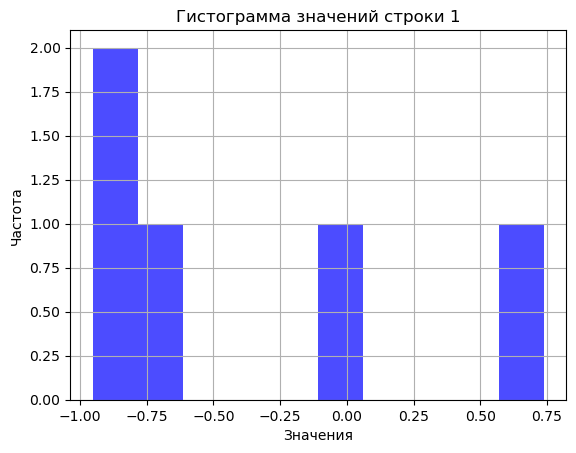

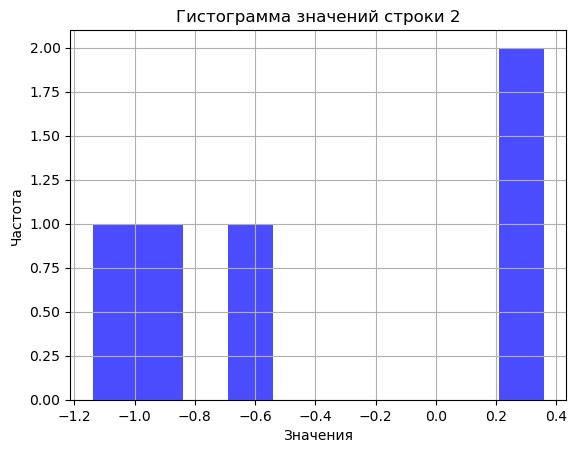

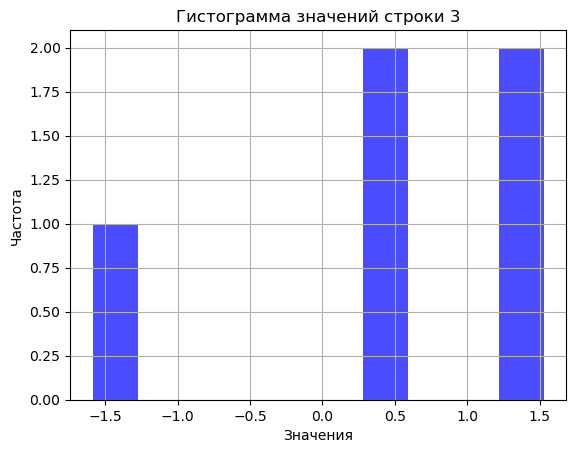

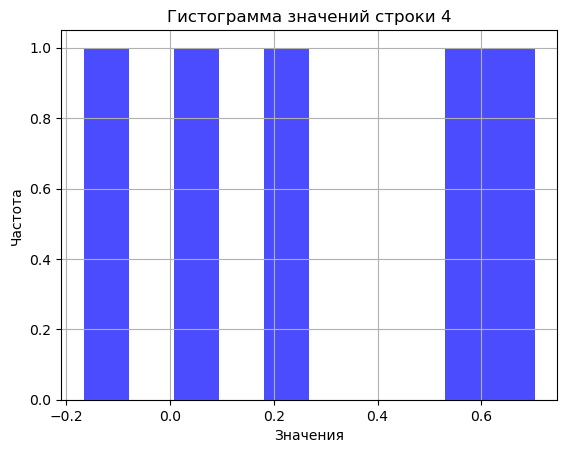

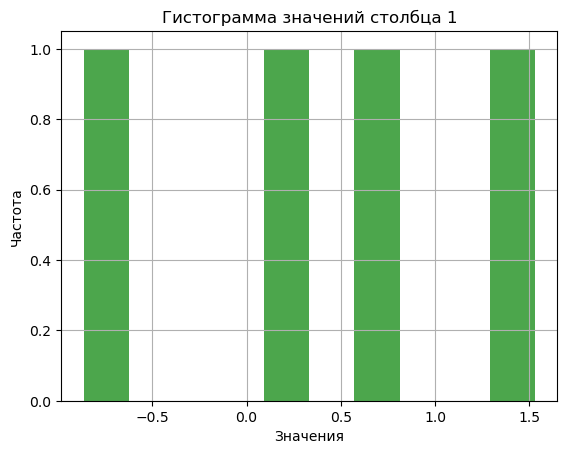

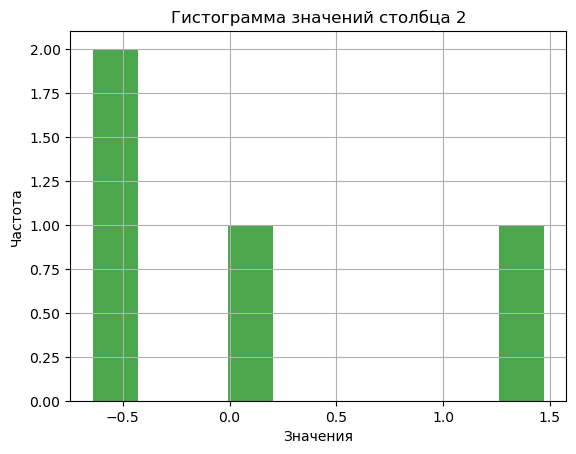

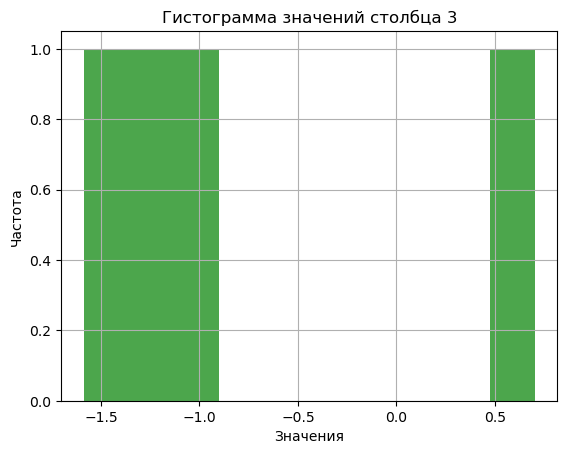

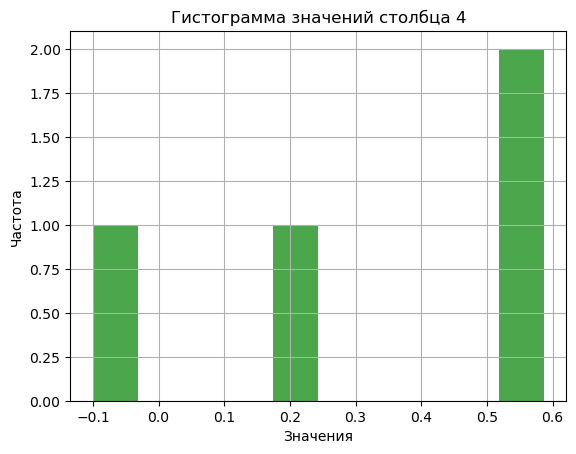

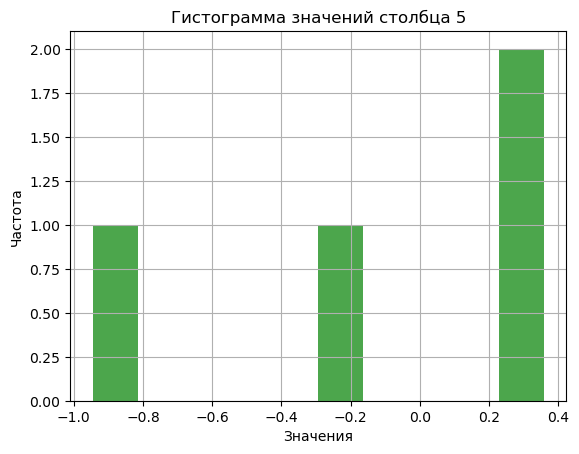

In [6]:
def generate_matrix_and_statistics(m, n):
    matrix = np.random.normal(loc=0, scale=1, size=(m, n))
    
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)
    
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)

    print("Математическое ожидание для строк:", row_means)
    print("Дисперсия для строк:", row_variances)
    print("Математическое ожидание для столбцов:", col_means)
    print("Дисперсия для столбцов:", col_variances)


    for i in range(m):
        plt.figure()
        plt.hist(matrix[i], bins=10, alpha=0.7, color='blue')
        plt.title(f'Гистограмма значений строки {i + 1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid()
        plt.show()

    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='green')
        plt.title(f'Гистограмма значений столбца {j + 1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid()
        plt.show()

# Пример вызова функции с матрицей 4x5
generate_matrix_and_statistics(4, 5)



<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [7]:

def chess(m, n, a, b):
    matrix = [[0] * n for _ in range(m)]
    
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b

    return matrix


def test_chess():
    # Тест 1: Проверка шахматного порядка для 2x2
    result = chess(2, 2, 1, 0)
    expected = [[1, 0], [0, 1]]
    assert result == expected, f'Test 1 failed: {result} != {expected}'

    # Тест 2: Проверка шахматного порядка для 3x3
    result = chess(3, 3, 1, 0)
    expected = [[1, 0, 1], [0, 1, 0], [1, 0, 1]]
    assert result == expected, f'Test 2 failed: {result} != {expected}'

    # Тест 3: Проверка шахматного порядка для 1x5
    result = chess(1, 5, 5, 10)
    expected = [[5, 10, 5, 10, 5]]
    assert result == expected, f'Test 3 failed: {result} != {expected}'

    print("Все тесты пройдены!")

test_chess()




Все тесты пройдены!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [13]:

from PIL import Image, ImageDraw

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = Image.new('RGB', (n, m), background_color)
    draw = ImageDraw.Draw(image)
    
    draw.rectangle([0, 0, a, b], fill=rectangle_color)
    
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = Image.new('RGB', (n, m), background_color)
    draw = ImageDraw.Draw(image)

    draw.ellipse([0, 0, a, b], fill=ellipse_color)

    return image

def test_drawing_functions():
    rectangle = draw_rectangle(100, 50, 200, 300, (255, 0, 0), (255, 255, 255))
    rectangle.save("rectangle.png")

    ellipse = draw_ellipse(100, 50, 200, 300, (0, 0, 255), (255, 255, 255))
    ellipse.save("ellipse.png")

test_drawing_functions()



<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [14]:
import pandas as pd

# Пример временного ряда
time_series = [1, 3, 2, 5, 7, 4, 6, 8, 5, 9]

mean = np.mean(time_series)
variance = np.var(time_series)
std_dev = np.sqrt(variance)

local_maxima = [time_series[i] for i in range(1, len(time_series) - 1) if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]]
local_minima = [time_series[i] for i in range(1, len(time_series) - 1) if time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]]

p = 3 
smoothed_series = pd.Series(time_series).rolling(window=p).mean().tolist()

print(f"Математическое ожидание: {mean}")
print(f"Дисперсия: {variance}")
print(f"СКО: {std_dev}")
print(f"Локальные максимумы: {local_maxima}")
print(f"Локальные минимумы: {local_minima}")
print(f"Скользящее среднее (окно {p}): {smoothed_series}")



Математическое ожидание: 5.0
Дисперсия: 6.0
СКО: 2.449489742783178
Локальные максимумы: [3, 7, 8]
Локальные минимумы: [2, 4, 5]
Скользящее среднее (окно 3): [nan, nan, 2.0, 3.3333333333333335, 4.666666666666667, 5.333333333333333, 5.666666666666667, 6.0, 6.333333333333333, 7.333333333333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [15]:
def one_hot_encoding(labels):
    num_classes = np.max(labels) + 1
    one_hot_matrix = np.zeros((len(labels), num_classes))
    
    for i, label in enumerate(labels):
        one_hot_matrix[i, label] = 1
        
    return one_hot_matrix

# Пример 
labels = [0, 2, 3, 0]
one_hot_encoded = one_hot_encoding(labels)
print(one_hot_encoded)



[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
